# Поиск закономерностей успешности игр

Мы представляем проект для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017. 

**Цель исследования** - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования**
Данные об играх мы получили из файла `/datasets/games.csv`. 

О качестве данных нам ничего неизвестно, поэтому перед проведением исследования понадобится обзор данных.

Мы проведем предобработку данных: проверим данные на ошибки и оценим их влияние на исследование, постараемся исправить самые критичные ошибки данных, обработаем пропуски, приведем данные к необходимым типам, проведем дополнительные расчеты.

Затем мы проведем исследовательский анализ, сравним продажи игр в разные периоды и оценим влияние платформы, отзывов, региона на продажи. 

На основе данных мы представим портрет пользователя каждого региона (самые популярные платформы, жанры и влияние рейтинга ESRB на продажи).

Мы сформулировали следующие гипотезы: 
* средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Проверим их на имеющихся данных.

Таким образом, решение пройдет в пять этапов.

## Обзор данных

Составим представление о данных. Импортируем специальную библиотеку pandas для обработки и анализа данных. 

In [69]:
import pandas as pd # импорт библиотеки pandas
# import numpy as np # импорт библиотеки numpy для математических вычислений
import matplotlib.pyplot as plt # импорт части библиотеки matplotlib
import seaborn as sns # импорт библиотеки seaborn для работы с графиками
from scipy import stats as st


Прочитаем файл `/datasets/games.csv` и сохраним его в переменной `df`:

In [2]:
# чтение файла с данными и сохранение в df
try:
    # адрес в локальном окружении
    df = pd.read_csv('games.csv')
except:
    # адрес в среде 'practicum'
    df = pd.read_csv('/datasets/games.csv')

Выведем на экран первые пять строк таблицы

In [3]:
display(df.head()) # получение первых 5 строк таблицы df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Получим общую информацию о таблицe.

In [4]:
df.info() # получение общей информации о данных в таблице df_tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов. Согласно документации к данным:
* `Name` — название игры, тип данных - object;
* `Platform` — платформа, тип данных - object;
* `Year_of_Release` — год выпуска, тип данных - float64;
* `Genre` — жанр игры, тип данных - object;
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий), тип данных - float64;
* `EU_sales` — продажи в Европе (миллионы проданных копий), тип данных - float64;
* `JP_sales` — продажи в Японии (миллионы проданных копий), тип данных - float64;
* `Other_sales` — продажи в других странах (миллионы проданных копий), тип данных - float64;
* `Critic_Score` — оценка критиков (максимум 100), тип данных - float64;
* `User_Score` — оценка пользователей (максимум 10), тип данных - object;
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board), тип данных - object. 

*ESRB (Entertainment Software Rating Board)* — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

***Примечание***
Данные за 2016 год могут быть неполными.

**Выводы**

Данные об играх содержатся в 11 столбцах таблицы. 
Количество значений в столбцах неодинаково, это значит в данных есть пропуски. 
Названия столбцов не соответствуют правилам хорошего стиля - в них есть заглавные буквы.
Содержание столбцов и тип данных не всегда соответствуют друг другу: оценка пользователей сохраена в строковом формате, год - в дробном.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

Обработаем названия столбцов, исключим пропуски данных и дубликаты, проверим данные на наличие аномалий и при необходимости избавимся от них. Приведем данные к необходимым типам.

### Приведение названий столбцов к хорошему стилю

Заменим названия столбцов - приведем к нижнему регистру.

In [5]:
# 
df.columns = df.columns.str.lower()
# Проверка - вывод названий столбцов
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Теперь названия столбцов в порядке. 

### Обработка пропущенных значений

Обработаем пропуски. Определим, в каких столбцах пропуски в наличии.

In [6]:
# Запрос количества пропущенных значений по столбцам.
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В таблице отсутствуют данные о названии и жанре 2 игр, годе выпуска 269 игр, а также несколько тысяч оценок критиков, пользователей и рейтинг. 
Игры без названия и жанра необходимо удалить из анализа.
В реальном проекте можно было бы обратиться к внешним данным, чтобы восстановить год выпуска игр, однако сейчас у нас такой задачи нет, поэтому их также удалим из анализа.

In [7]:
# Удаление строк с пропущенными данными в названии, жанре или годе выпуска
df.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)
# Проверка - запрос доли пропущенных значений по столбцам.
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.401666
rating             0.405984
dtype: float64

Итак, мы избавились от пропусков в некоторых ячейках, однако в столбцах critic_score пропущенных значений оказалось больше половины, user_score и rating - более 40%.  Удалять эти данные не стоит, однако и заполнять данные медианными данными не совсем верно - нельзя, чтобы наши расчеты повлияли на оценки и рейтинг.
Заполним пропущенные значения оценок критиков и зрителей отрицательными медианными значениями по жанру. Тогда нам при необходимости легко будет узнать, какие значения являются сгенерированными.


In [8]:
# Замена на медиану с отрицательным знаком
df['critic_score'] = df['critic_score'].fillna(-df.groupby('genre')['critic_score'].transform('median'))
# Проверка - вывод суммы пропущенных значений по столбцу
print('Количество пропущенных значений в столбце critic_score -', df['critic_score'].isna().sum())
# Проверка - вывод первых пяти строк таблицы
df.head()

Количество пропущенных значений в столбце critic_score - 0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-69.5,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-74.0,NaN,NaN


Мы заполнили пропущенные значения в столбце critic_score.
Aналогичным образом заполним пропущенные значения в столбце user_score. 
В этом столбце помимо просто пропущенных значений есть значения 'tbd' - to be determined. Эта аббревиатура используется в случае, когда значений пока нет, но ожидается обновление данных в будущем и значения могут появиться.
В нашем случае принципиальной разницы между пропущенными значениями и значениями 'tbd' нет, поэтому заменим их на произвольную отрицательную величину, например '-1', а пропущенные значения - на '-2'.

In [9]:
# Замена значений 'tbd' на отрицательную величину
df.loc[df['user_score'] == 'tbd', 'user_score']=-1
# Замена пропущенных значений на отрицательную величину
df['user_score'] = df['user_score'].fillna(-2)
# Проверка - вывод суммы пропущенных значений по столбцу
print('Количество пропущенных значений в столбце user_score -', df['user_score'].isna().sum())
# Проверка - вывод первых пяти строк таблицы
df.head()

Количество пропущенных значений в столбце user_score - 0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-69.5,-2,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-74.0,-2,NaN


Теперь заменим пропущенные значения в столбце rating на unknown - неизвестно.

In [10]:
# Замена пропущенных значений
df['rating'] = df['rating'].fillna('unknown')
# Проверка - вывод суммы пропущенных значений по столбцу
print('Количество пропущенных значений в столбце rating', df['rating'].isna().sum())
# Проверка - вывод первых пяти строк таблицы
df.head()

Количество пропущенных значений в столбце rating 0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-69.5,-2,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-74.0,-2,unknown


**Вывод**:
Возможные причины пропусков в данных:
- техническая ошибка (например, отсутствие имени игры или года выпуска), 
- соединение данных из нескольких источников и их неполное совпадение,
- отсутствие необходимых данных (например, оценочная система могла быть введена после какого-то года и ранние игры оценок не имеют, либо наоборот, не критики не успели оценить новые игры).

Мы не стали заполнять пропуски в столбцах name, year_of_release и genre, так как это - важнейшие для нашего исследования параметры, а у нас не было данных, чтобы восстановить пропуски.
Мы заполнили пропуски в столбцах critic_score и user_score отрицательными значениями, для того, чтобы при необходимости можно было легко исключить их из анализа. Оценки пользователей 'tbd' (будет определено в дальнейшем) мы обработали как пропуски, выбрав разные значения для замены обычных пропусков и полей 'tbd', чтобы при необходимости можно было эти поля различить.
В столбце rating мы заполнили пропуски значением unknown, чтобы явно выделить игры, по которым данных о жанровой маркировке нет. 

### Преобразование типов данных

Преобразуем данные в нужные типы. Сначала запросим характеристику всех столбцов.

In [11]:
# Запрос информации о всех столбцах таблицы
df.info()
# Вывод первых 5 строк таблицы
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-69.5,-2,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-74.0,-2,unknown


Тип данных необходимо заменить в следующих столбцах:
- year_of_release - с дробного на целочисленный (год), так как формат дата не такой удобный для обработки;
- critic_score - с дробного на целочисленный, так как все значения в этом столбце целые;
- user_score - со строкового на дробный, так как в содержании оценки с дробной частью.

In [12]:
# Замена типа данных с помощью метода .to_datetime(), формат - год 
df['year_of_release'] = df['year_of_release'].astype(int)
# Запрос получившегося типа данных
type(df['year_of_release'].dtype)

numpy.dtype[int64]

Замена произведена удачно. Теперь преобразуем столбец с оценками критиков.

In [13]:
# Замена типа данных с помощью метода .astype 
df['critic_score'] = df['critic_score'].astype(int)
# Запрос получившегося типа данных
type(df['critic_score'].dtype)

numpy.dtype[int64]

Также успешно. Наконец, заменим тип в столбце с оценками пользователей.

In [14]:
# Замена типа данных с помощью метода .astype 
df['user_score'] = df['user_score'].astype(float)
# Запрос получившегося типа данных
type(df['user_score'].dtype)

numpy.dtype[float64]

И этот столбец успешно приведен к верному формату. Проверим все столбцы.

In [15]:
# Запрос основной информации обо всех столбцах таблицы
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Теперь, когда мы избавились от пропущенных значений и все столбцы имеют верный формат данных, проверим данные на аномалии.

### Проверка данных на аномалии и дубликаты

Проверим данные на аномалии. Сначала - оценим общую картину в количественных переменных с помощью метода describe. Так мы увидим количество значений, минимальное и максиальное значение по столбцам и некоторые другие сведения.

In [16]:
# Запрос основных характеристик количественных переменных таблицы 
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,-2.700195,2.286414
std,5.875525,0.818378,0.506716,0.311100,0.188005,70.345051,4.537975
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-75.000000,-2.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-69.000000,-2.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-66.000000,-1.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Рассмотрев характеристику данных, признаем, что особых аномалий в таблицах нет, качество данных достаточно высоко. Проверим категориальные переменные. кроме переменной name - содержание данной переменной нам для анализа не пригодится.

In [17]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-69,-2.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-74,-2.0,unknown


In [18]:
# Запрос значений столбца
print(df['platform'].value_counts())
print('Всего наименований - ', df['platform'].value_counts().count())

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64
Всего наименований -  31


Всего наименований платформ 31, причем для 7 из  них существует больше 1000 игр. Аномалий не заметно. 
Проверим жанры игр.

In [19]:
# Запрос значений столбца
print(df['genre'].value_counts())
print('Всего жанров - ', df['genre'].value_counts().count())

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64
Всего жанров -  12


В столбце жанры также не наблюдается аномалий. Проверим столбец рейтинг.

In [20]:
# Запрос значений столбца
print(df['rating'].value_counts())
print('Всего видов - ', df['rating'].value_counts().count())

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64
Всего видов -  9


В системе ESRB (Enterntainment Software Rating Board) уровень рейтинга связан с возрастом аудитории, для которой содержание продукта - в данном случае игры, - подходит. Современный рейтинг включает категории:
* `E` - everyone, для всех возрастов;
* `E10+` - everyone 10+, для всех старше 10 лет;
* `T` - teen, для всех старше 12 лет;
* `M` - mature 17+, для зрелых, старше 17 лет;
* `AO` - adults only 18+, для взрослых, старше 18 лет;
* `RP` - rating pending, рейтинг в процессе определелния.

В данных встречаются старые версии
* `K-A` - kids to adult - от детей до взрослых, сейчас это категория everyone - для всех возрастов;
* `EC` - early childhood - раннее детство, от 3 лет, сейчас это также категория everyone - для всех возрастов.

Изменим рейтинг жанров на соответствующий действующей системе.

In [21]:
# Замена значений в столбце жанры
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'
df.loc[df['rating'] == 'EC', 'rating'] = 'E'
# Проверка - запрос значений столбца
print(df['rating'].value_counts())

unknown    6676
E          3932
T          2905
M          1536
E10+       1393
AO            1
RP            1
Name: rating, dtype: int64


Теперь проверим таблицу на явные дубликаты.

In [22]:
df.duplicated().sum()

0

Явных дубликатов в таблице нет. 
Мы проверили данные на аномалии и дубликаты, устранили небольшие погрешности и теперь можем рассчитать необходимые данные.

### Расчет и добавление столбцов в таблицы

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [23]:
# Создание нового столбца на основе имеющихся
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
# Проверка - запрос первых пяти строк таблиц
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-69,-2.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-74,-2.0,unknown,31.38


Мы успешно добавили столбeц в таблицу. 
Теперь наши данные подготовлены к проведению исследовательского анализа.

## Исследовательский анализ

Проведем исследовательский анализ. Нам важны характеристики игр и их влияние на продажи. Поэтому мы рассмотрим:
* динамику выпуска игр по годам,
* динамике продаж игр по платформам,
* характеристику перспективных на сегодня платформ, 
* взаимосвязь платформ и продаж,
* взаимосвязь отзывов и продаж,
* прибыльность жанров игр.

### Общая динамика выпуска новых игр

Посмотрим, сколько игр выпускалось в разные годы.

In [24]:
df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Итак, мы видим, что количество игр, выпускаемых каждый год неоднородно. В начале развития индустрии, в 1980х годах ежегодно выпускалось несколько десятков игр, с 1994 года - несколько сотен, 2006-2011 можно назвать временем расцвета индустрии, когда выпускалось свыше 1000 игр в год. В 2012 году произошло значительный спад производства игр, с 2014 года начинается некоторый рост. В последнем году игр меньше, чем в предыдущем, но это может быть связано с неполнотой даннных.

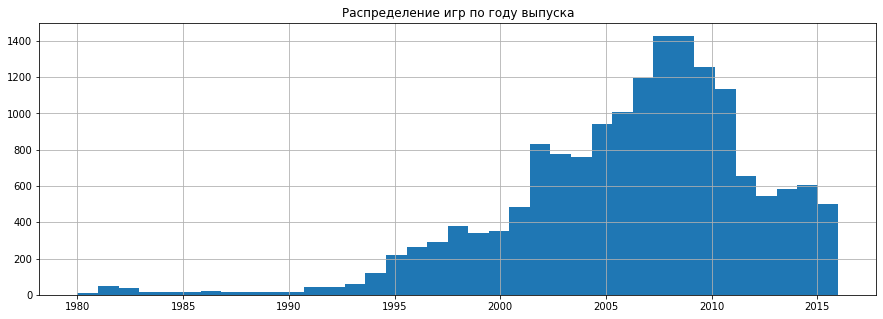

In [25]:
df['year_of_release'].hist(bins=37, color='tab:blue', figsize=(15,5))
plt.title('Распределение игр по году выпуска')
plt.grid(True)
plt.show()

Важны ли данные за все периоды? Для нашего практического кейса - нет, нас интересует только актуальный этап. Судя по гистограмме он начался в 2012 году после значительного снижения выпуска игр. Сравним с информацией по конкретным платформам. 

### Динамика выпуска игр по платформам

Посмотрим, как менялись продажи по платформам. Также выберем платформы с наибольшими суммарными продажами - лимит определим в 5% всех игр. 

In [26]:
# Запрос значений столбца
print('Всего платформ - ', df['platform'].value_counts().count())
print('Всего игр для всех платформ - ', df['platform'].value_counts().sum())
print('5% игр - ', df['platform'].value_counts().sum() / 20)
df['platform'].value_counts()[df['platform'].value_counts() > df['platform'].value_counts().sum() / 20]

Всего платформ -  31
Всего игр для всех платформ -  16444
5% игр -  822.2


PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
Name: platform, dtype: int64

Платформ с наибольшим количеством игр получилось 8 - PS2, DS, PS3, Wii, X360, PSP, PS и PC. Но это информация за всю историю.
Выберем платформы с наибольшими суммарными продажами. Для этого используем сводную таблицу и график.

 Построим сводную таблицу по сумме продаж за последние 5 лет. 

In [27]:
# Построение сводной таблице по данным с 2012 года
platform_pivot = (df
    .query('year_of_release > 2011')
    .pivot_table(index = 'platform', 
                 columns = 'year_of_release', 
                 values = 'total_sales', 
                 aggfunc='sum', 
                 margins=True)
)
# Изменение индексации и сортировка по сумме продаж
platform_pivot = platform_pivot.reindex(platform_pivot['All'].sort_values(ascending=False).index)
# Демонстрация таблицы
display(platform_pivot)

year_of_release,2012,2013,2014,2015,2016,All
platform,,,,,,
All,355.84,361.24,331.53,267.98,129.94,1446.53
PS4,NaN,25.99,100.00,118.90,69.25,314.14
PS3,107.36,113.25,47.76,16.82,3.60,288.79
X360,99.74,88.58,34.74,11.96,1.52,236.54
3DS,51.36,56.57,43.76,27.78,15.14,194.61
XOne,NaN,18.96,54.07,60.14,26.15,159.32
WiiU,17.56,21.65,22.03,16.35,4.60,82.19
PC,23.22,12.38,13.28,8.52,5.25,62.65
PSV,16.19,10.59,11.90,6.25,4.25,49.18


Сумма продаж всех игр за последние 5 лет - свыше 1 446 млн. проданных копий, за последний год по доступным данным - около 130 млн. 
В качестве рубежа "перспективной" платформы определим долю в 5% от проданных игр. 
Тогда за последние 5 лет к "перспективным" можно отнести платформы PS4, PS3, X360, 3DS, XOne, WiiU. Из них наиболее перспективные - востребованные в последний год - PS4 - лидер, занимающий более половины рынка, XOne, 3DS.

Сроки существования платформы platform
2600    10
3DO      2
3DS      6
DC       7
DS      11
GB      13
GBA      8
GC       7
GEN      5
GG       1
N64      7
NES     12
NG       4
PC      26
PCFX     1
PS      10
PS2     12
PS3     11
PS4      4
PSP     12
PSV      6
SAT      6
SCD      2
SNES    10
TG16     1
WS       3
Wii     11
WiiU     5
X360    12
XB       9
XOne     4
dtype: int64
Средний срок существования платформы 7.67741935483871


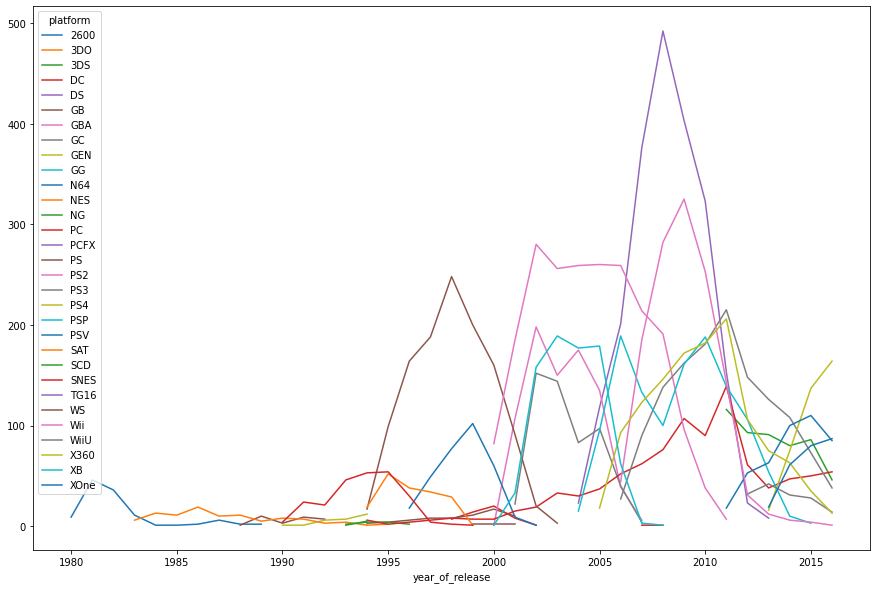

In [28]:
# Построение сводной таблице по данным всех лет
all_platfotm_pivot = df.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc='count')
# Вычисление срока существования платформы 
# Разность между общим числом лет наблюдений и количеством отсутствующих значений 
print('Сроки существования платформы', 37-all_platfotm_pivot.isna().sum())
print('Средний срок существования платформы', (37-all_platfotm_pivot.isna().sum()).mean())
# Построение графика продаж по данным всех лет
all_platfotm_pivot.plot(figsize=(15,10))
plt.show()

За какой характерный срок появляются новые и исчезают старые платформы?
На общем распределении продаж по годам заметно, что платформы появляются и пропадают. Анализ показывает - средний срок существования платформы - 7,7 лет. Да, некоторые платформы еще существуют, но в целом можно заметить, что кроме PC - персонального компьютера, который сохраняет актуальность как платформа уже 26 лет, одни платформы сменяют другие регулярно. 
Причем видно, что в нашем списке "перспективных" платформ некоторые уже преодолели рубеж в 7 лет - и "выходят" из лидеров. Это PS3 - 11 лет и X360 - 12 лет.

### Характеристика перспективных платформ

Учитывая, что ситуация в отрасли регулярно меняется, оставим только актуальные данные для нашего анализа. 
Возьмем данные за соответствующий актуальный период. 
Обратившись к данным развития отрасли и средней длинне жизненного цикла платформы, определим актуальный период как последние 5 лет. 
На основе этих данных постараемся построить прогноз на 2017 год.
Не будем учитывать в работе данные за предыдущие годы.

In [29]:
# Создание таблицы с информацией только о последних 5 годах
good_df = df.query('year_of_release > 2011')
# Запрос информации о таблице
good_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     2886 non-null   int64  
 9   user_score       2886 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 293.1+ KB


В таблице осталоось лишь 2886 строк, зато эти данные актуальные. 

Какие платформы лидируют по продажам, растут или падают? Построим сводную таблицу по по актуальным данным.

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,93.0,23.0,61.0,148.0,NaN,106.0,53.0,31.0,32.0,106.0,NaN
2013,91.0,8.0,38.0,126.0,16.0,54.0,63.0,12.0,42.0,75.0,19.0
2014,80.0,NaN,47.0,108.0,75.0,10.0,100.0,6.0,31.0,63.0,61.0
2015,86.0,NaN,50.0,73.0,137.0,3.0,110.0,4.0,28.0,35.0,80.0
2016,46.0,NaN,54.0,38.0,164.0,NaN,85.0,1.0,14.0,13.0,87.0


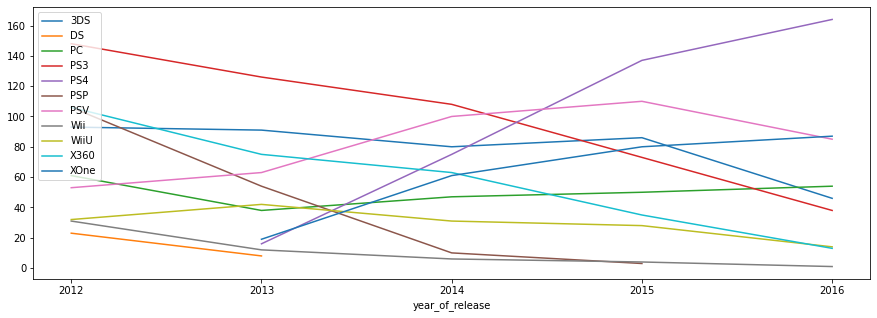

In [30]:
recent_platform_pivot = (good_df
                         .pivot_table(index='year_of_release', 
                                      columns='platform', 
                                      values='total_sales', 
                                      aggfunc='count')
                        )
display(recent_platform_pivot)
recent_platform_pivot.plot(figsize = (15,5))
plt.legend(loc='upper left')
plt.xticks(ticks=[2012, 2013, 2014, 2015, 2016], labels=None)
plt.show()

Среди платформ есть явный лидер - PS4, за ним идут PSV и XOne. Если продажи PSV хоть и на высоком уровне, но снижаются, то XOne демонстрирует некоторый рост. Следующая группа - PC, имеющий самую долгую историю и сохраняющий уверенные позиции на протяжении десятилетий и 3DS, занимавший уверенные позиции и теперь падающий и PS3, бывший лидер индустрии, теперь уступающий новому поколению приставок.
DS и PSP не будем рассматривать, так как к 2016 году они совсем потеряли актуальность. Wii, WiiU и X360 имеют слишком маленький объем продаж, чтобы их рассматривать в качестве перспективных платформ. 
Среди крупных игроков:
- растут продажи: PS4, XOne, PC. 
- снижаются: PSV, 3DS, PS3.

### Взаимосвязь платформ и продаж

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Сначала рассмотрим данные за последние 5 лет.

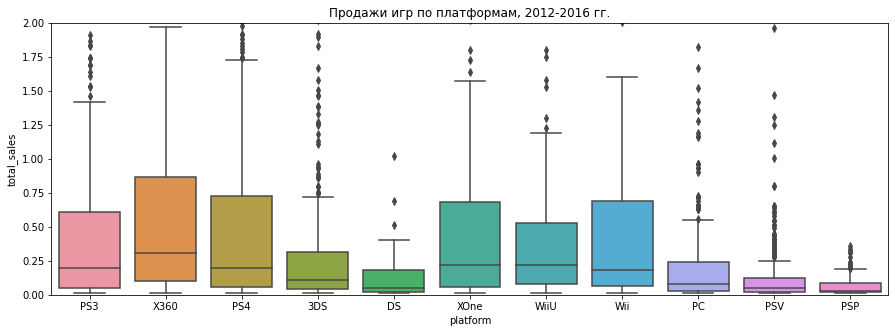

In [31]:
# Построение диаграмм с помощью библиотек seaborn и matplotlib
plt.figure(figsize = (15,5))
sns.boxplot(data=good_df, 
            x='platform', 
            y='total_sales') 
plt.title('Продажи игр по платформам, 2012-2016 гг.')
plt.ylim(0, 2)
plt.title('Продажи игр по платформам, 2012-2016 гг.')
plt.show()

Итак, самые высокие продажи в среднем имеют платформы X360. Достаточно высокие средние показатели у PS3, PS4, WiiU, Wii  и XOne. Несмотря на возможную популярность платформ, средние продажи 3DS, PC, PSV, PSP значительно ниже.
Рассмотрим более подробно данные за 2016 год.

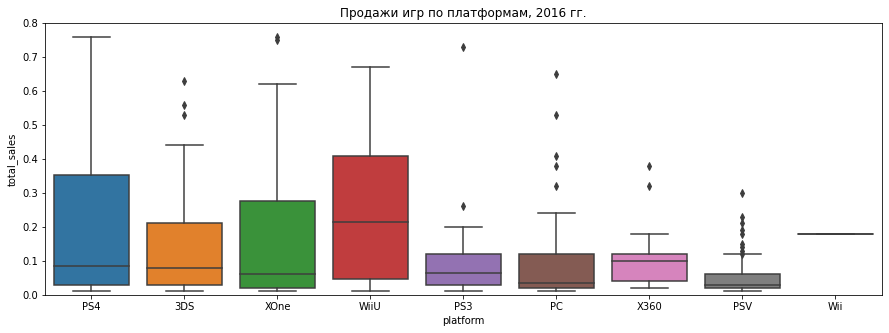

In [32]:
# Построение диаграмм с помощью библиотек seaborn и matplotlib
plt.figure(figsize = (15,5))
sns.boxplot(data=good_df.query('year_of_release == 2016'), 
            x='platform', 
            y='total_sales') 
plt.ylim(0, 0.8)
plt.title('Продажи игр по платформам, 2016 гг.')
plt.show()

Несколько платформ покинуло рейтинг продаж. К лидерам по продажам можно отнести PS4, WiiU, XOne 3DS.

**Вывод:**
Среди лидеров среди платформ - звезда PS4, на которую приходится около трети продаж последнего года, наибольший среднее количество продаж по платформе - у WiiU, сильные игроки растущий XOne и снижающийся PSV, PC сохраняет свою значительную долю рынка.  

### Взаимосвязь отзывов и продаж

Посмотрим, как влияют на продажи внутри одной платформы отзывы пользователей и критиков. 
В качестве примера платформы выберем самую популярную платформу последнего времени - PS4. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

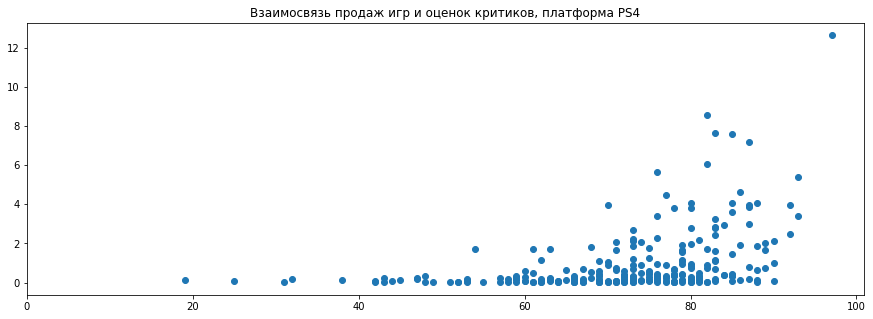

Коэффициент корреляции Пирсона между продажами игр и отзывами критиков; 0.40656790206178095


In [33]:
# Отбор релевантных данных по приставке
good_df_ps4 = good_df.query('platform == "PS4" and critic_score > 0')
# Построение диаграммы рассеяния с помощью пакета matplotlib
plt.figure(figsize = (15,5))
plt.scatter(data=good_df_ps4, 
            x = 'critic_score', 
            y='total_sales')
plt.xlim(left=0)
plt.title('Взаимосвязь продаж игр и оценок критиков, платформа PS4')
plt.show()
# Расчет коэффициента корреляции Пирсона
print('Коэффициент корреляции Пирсона между продажами игр и отзывами критиков;', end = ' ')
print(good_df_ps4['critic_score']
      .corr(good_df_ps4['total_sales']))

Построим аналогичную диаграмму и рассчитаем коэффициент корреляции для отзывов пользователей.

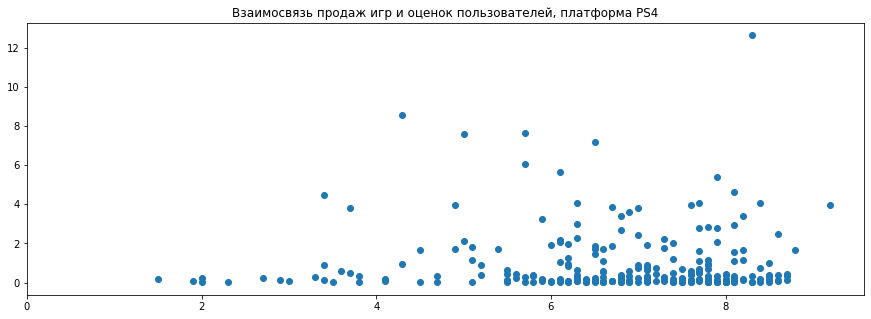

Коэффициент корреляции Пирсона между продажами игр и отзывами критиков; 0.0023941352579608267


In [34]:
# Отбор релевантных данных по приставке
good_df_ps4_user = good_df.query('platform == "PS4" and user_score >= 0')
# Построение диаграммы рассеяния с помощью пакета matplotlib
plt.figure(figsize = (15,5))
plt.scatter(data=good_df_ps4_user, 
            x = 'user_score', 
            y='total_sales')
plt.xlim(left=0)
plt.title('Взаимосвязь продаж игр и оценок пользователей, платформа PS4')
plt.show()
# Расчет коэффициента корреляции Пирсона
print('Коэффициент корреляции Пирсона между продажами игр и отзывами критиков;', end = ' ')
print(good_df_ps4['user_score']
      .corr(good_df_ps4['total_sales']))

Диаграммы рассеяния показывают: существует слабая связь между оценками критиков и продажами игр, а связь между оценками пользователей и продажами игр отсутствует. 

**Вывод:**
Анализ данных по платформе PS4 показал: существует слабая корреляционная связь между оценками критиков и продажами игр, однако связь между продажами и оценками пользователей не была обнаружена. При планировании необходимо в первую очередь обращать внимание на экспертные, а не на пользовательские оценки.

### Взаимосвязь жанров и продаж

Посмотрим на общее распределение игр по жанрам. Построим сводную таблицу с информацией о количестве игр и сумме продаж. 

In [35]:
# Построение сводной таблицы
pivot_genre = good_df.pivot_table(index='genre', 
                                  values='total_sales', 
                                  aggfunc=['sum', 'count', 'median'])
# Переименование столбцов
pivot_genre.columns = ['sales_sum', 'games_count', 'sales_median']
# Демонстрация таблицы с сортировкой по сумме продаж
pivot_genre.sort_values(['sales_sum'], ascending=False)

,sales_sum,games_count,sales_median
genre,,,
Action,441.12,1031,0.120
Shooter,304.73,235,0.440
Role-Playing,192.80,370,0.140
Sports,181.07,268,0.240
Misc,85.04,192,0.120
Platform,61.00,85,0.210
Racing,53.50,115,0.140
Fighting,44.49,109,0.130
Simulation,35.12,80,0.120


Что можно сказать о самых прибыльных жанрах? 
Среди всех жанров в качестве наиболее прибыльных можно выделить 
- Action - более 440 миллионов проданных игр, 
- Shooter - свыше 300 миллионов,
- Role-Playing	и Sports - по 180-190 миллионов. 

Меньше всего сумма продаж у жанров:
- Puzzle - менее 5 миллионов,
- Strategy - менее 15 миллионов. 

Остальные жанры за пять лет имеют несколько десятков миллионов проданных копий.

Особенность состоит в том, что охват одной игрой в жанрах неодинаков. В медианном значении на одну игру приходится  120-140 тысяч продаж, однако есть жанры с большей "концентрацией пользователей" и меньшим количеством игр:
- Shooter - медиана составляет 440 000 пользователей у одной игры,
- Sports - медиана 240 000 пользователей у одной игры,

## Портрет пользователя каждого региона

Перейдем к влиянию территории на пользовательское поведение. 
Определим для пользователя каждого региона: Северная Америка (NA), Европейский союз (EU), Япония (JP):
- самые популярные платформы (топ-5). Опишем различия в долях продаж;
- самые популярные жанры (топ-5). Поясним разницу.
- влияние рейтинга ESRB на продажи в отдельном регионе


### Популярность платформ по регионам

In [36]:
# Выбор наиболее популярных платформ по регионам 
na_data = good_df.groupby(['platform'])['na_sales'].sum().sort_values(ascending=False)
# Расчет доли платформы в общих продажах по региону
na_data_share = round(na_data / na_data.sum () * 100, 2)
# Соединяем информацию о числе продаж и долях в единую таблицу и запрашиваем первые 5 строк
pd.concat([na_data, na_data_share], axis=1).reset_index().head()

,platform,na_sales,na_sales
0,X360,140.05,23.70
1,PS4,108.74,18.40
2,PS3,103.38,17.49
3,XOne,93.12,15.76
4,3DS,55.31,9.36


Самая популярная платформа в Северной Америке за последние 5 лет - X360, занимает более пятой части рынка. Следуют за ним PS4 - более 18%, набирает популярность и PS3, интерес к которой снижается. Также в ТОП-5 входят XOne и 3DS.

In [37]:
# Выбор наиболее популярных платформ по регионам 
eu_data = good_df.groupby(['platform'])['eu_sales'].sum().sort_values(ascending=False)
# Расчет доли платформы в общих продажах по региону
eu_data_share = round(eu_data / eu_data.sum () * 100, 2)
# Соединяем информацию о числе продаж и долях в единую таблицу и запрашиваем первые 5 строк
pd.concat([eu_data, eu_data_share], axis=1).reset_index().head()

,platform,eu_sales,eu_sales
0,PS4,141.09,27.84
1,PS3,106.86,21.08
2,X360,74.52,14.70
3,XOne,51.59,10.18
4,3DS,42.64,8.41


Состав лидеров в Европейском союзе и Северной Америке совпадает, однако здесь лидируют платформы PS: PS4 - около 28%, PS3 - около 20%, X360 - около 15% рынка, XOne и 3DS как и в Северной Америке на 4 и 5 местах по продажам.

In [38]:
# Выбор наиболее популярных платформ по регионам 
jp_data = good_df.groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False)
# Расчет доли платформы в общих продажах по региону
jp_data_share = round(jp_data / jp_data.sum () * 100, 2).head()
# Соединяем информацию о числе продаж и долях в единую таблицу и запрашиваем первые 5 строк
pd.concat([jp_data, jp_data_share], axis=1).reset_index().head()

,platform,jp_sales,jp_sales
0,3DS,87.79,45.59
1,PS3,35.29,18.32
2,PSV,21.04,10.93
3,PS4,15.96,8.29
4,WiiU,13.01,6.76


По структуре японский рынок существенно отличается от европейского и американского. Платформа 3DS занимает здесь почти половину - свыше 45% продаж, PS3 - 18%, PSV - 11%, PS4-8% , в рейтинг также вошел WiiU - около 7%. Отсутствуют в рейтинге американский лидер X360 и Xone. 

### Популярность жанров по регионам

Рассмотрим популярность жанров игр по регионам. 

In [39]:
# Построение сводной таблицы
pivot_genre_na = good_df.pivot_table(index='genre', 
                                  values='na_sales', 
                                  aggfunc=['sum', 'count', 'median'])
# Переименование столбцов
pivot_genre_na.columns = ['sales_sum_na', 'games_count_na', 'sales_median_na']
# Демонстрация таблицы с сортировкой по сумме продаж
pivot_genre_na.sort_values(['sales_sum_na'], ascending=False)

,sales_sum_na,games_count_na,sales_median_na
genre,,,
Action,177.84,1031,0.02
Shooter,144.77,235,0.20
Sports,81.53,268,0.08
Role-Playing,64.00,370,0.02
Misc,38.19,192,0.01
Platform,25.38,85,0.09
Fighting,19.79,109,0.05
Racing,17.22,115,0.04
Adventure,8.92,302,0.00


В Северной Америке наиболее популярные жанры - Action, Shooter, Sports. 
В группу игр с несколькими десятками миллионов копий входят Role-Playing, Platformб Fighting и Racing.
Adventure, Simulation, Strategy и Puzzle замыкают рейтинг.

In [40]:
# Построение сводной таблицы
pivot_genre_eu = good_df.pivot_table(index='genre', 
                                  values='eu_sales', 
                                  aggfunc=['sum', 'count', 'median'])
# Переименование столбцов
pivot_genre_eu.columns = ['sales_sum_eu', 'games_count_eu', 'sales_median_eu']
# Демонстрация таблицы с сортировкой по сумме продаж
pivot_genre_eu.sort_values(['sales_sum_eu'], ascending=False)

,sales_sum_eu,games_count_eu,sales_median_eu
genre,,,
Action,159.34,1031,0.020
Shooter,113.47,235,0.170
Sports,69.09,268,0.050
Role-Playing,48.53,370,0.010
Racing,27.29,115,0.090
Misc,26.32,192,0.015
Platform,21.41,85,0.080
Simulation,14.55,80,0.030
Fighting,10.79,109,0.020


В целом рейтинг жанров в Европе похож на североамериканский. Немного популярнее Racing и Simulation, менее популярный Fighting.

In [41]:
# Построение сводной таблицы
pivot_genre_jp = good_df.pivot_table(index='genre', 
                                  values='jp_sales', 
                                  aggfunc=['sum', 'count', 'median'])
# Переименование столбцов
pivot_genre_jp.columns = ['sales_sum_jp', 'games_count_jp', 'sales_median_jp']
# Демонстрация таблицы с сортировкой по сумме продаж
pivot_genre_jp.sort_values(['sales_sum_jp'], ascending=False)

,sales_sum_jp,games_count_jp,sales_median_jp
genre,,,
Role-Playing,65.44,370,0.06
Action,52.80,1031,0.01
Misc,12.86,192,0.02
Simulation,10.41,80,0.00
Fighting,9.44,109,0.03
Shooter,9.23,235,0.00
Platform,8.63,85,0.00
Adventure,8.24,302,0.01
Sports,8.01,268,0.00


Японские жанровые предпочтения отличаются. Здесь на первом месте - Role-Playing, затем Action, Simulation и Misc. В аутсайдерах = Straategy, Racing, Puzzle.

In [55]:
# Объединение данных таблиц по регионам для сравнения
pivot_genre_reg = pivot_genre_na.join(pivot_genre_eu['sales_sum_eu'], on='genre')
pivot_genre_reg = pivot_genre_reg.join(pivot_genre_jp['sales_sum_jp'], on='genre')
# Удаление лишних столбцов
pivot_genre_reg = pivot_genre_reg.drop(['games_count_na', 'sales_median_na'], 1)
# Показ таблицы
pivot_genre_reg

,sales_sum_na,sales_sum_eu,sales_sum_jp
genre,,,
Action,177.84,159.34,52.80
Adventure,8.92,9.46,8.24
Fighting,19.79,10.79,9.44
Misc,38.19,26.32,12.86
Platform,25.38,21.41,8.63
Puzzle,1.13,1.40,2.14
Racing,17.22,27.29,2.50
Role-Playing,64.00,48.53,65.44
Shooter,144.77,113.47,9.23


Рынки Европы и Северной Америке схожи по жанровому наполнению и объему, японский рынок значительно меньше и отличается по популярным жанрам.

### Влияние рейтинга ESRB на продажи по регионам

Рассмотрим, как рейтинг ESRB влияет на продажи по регионам.

In [63]:
# Построение сводной таблицы
pivot_rating_na = good_df.pivot_table(index='rating', 
                                  values='na_sales', 
                                  aggfunc='sum')
# Переименование столбцов
pivot_rating_na.columns = ['sales_sum_na']
pivot_rating_na['share_na'] = round(pivot_rating_na['sales_sum_na'] / pivot_rating_na['sales_sum_na'].sum(), 2)
# Демонстрация таблицы с сортировкой по сумме продаж
pivot_rating_na

,sales_sum_na,share_na
rating,,
E,114.37,0.19
E10+,75.70,0.13
M,231.57,0.39
T,66.02,0.11
unknown,103.31,0.17


Наибольшей популярностью в Северной Америке пользуются игры с рейтингом М - для взрослых. Также достаточное количество игр продается в категории E - около пятой части. 

In [65]:
# Построение сводной таблицы
pivot_rating_eu = good_df.pivot_table(index='rating', 
                                  values='eu_sales', 
                                  aggfunc='sum')
# Переименование столбцов
pivot_rating_eu.columns = ['sales_sum_eu']
pivot_rating_eu['share_eu'] = round(pivot_rating_eu['sales_sum_eu'] / pivot_rating_eu['sales_sum_eu'].sum(), 2)
# Демонстрация таблицы с сортировкой по сумме продаж
pivot_rating_eu

,sales_sum_eu,share_eu
rating,,
E,113.03,0.22
E10+,55.37,0.11
M,193.96,0.38
T,52.96,0.10
unknown,91.50,0.18


Распределение игр по рейтингу в Европейском союзе похоже на североамериканское распределение. Также значительная доля игр для взрослой аудитории.

In [67]:
# Построение сводной таблицы
pivot_rating_jp = good_df.pivot_table(index='rating', 
                                  values='jp_sales', 
                                  aggfunc='sum')
# Переименование столбцов
pivot_rating_jp.columns = ['sales_sum_jp']
pivot_rating_jp['share_jp'] = round(pivot_rating_jp['sales_sum_jp'] / pivot_rating_jp['sales_sum_jp'].sum(), 2)
# Демонстрация таблицы с сортировкой по сумме продаж
pivot_rating_jp

,sales_sum_jp,share_jp
rating,,
E,28.33,0.15
E10+,8.19,0.04
M,21.20,0.11
T,26.02,0.14
unknown,108.84,0.57


Информация относительно рейтинга в Японии неполная - для большей части игр рейтинг не ясен. Среди остльных распространены игры для всех - 15%, для подростков - 14%. Однако, если удастстя восстановить рейтинги для игр в Японии ситуация может оказаться совсем другой.

###### Вывод:

Мы видим, что пользователи по разным рынкам различаются: Северная Америка и Европейский союз демонстрируют схожие тенденции - некоторая разница есть в предпочитаемых платформах и жанрах, но общие тенденции схожи.
Япония же является самобытным рынком - по жанрам, платформам и отношению к рейтингу она отличается от остальных двух регионов.

## Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

Сформулируем нулевые и альтернативные гипотезы для нашего исследования:
1. 
- Н0(нулевая гипотеза): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Н1(альтернативная гипотеза): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

2. 
- Н0(нулевая гипотеза): Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
- Н1(альтернативная гипотеза): Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Пороговое значение alpha примем равным 0.5.

Мы формулировали гипотезы исходя из положения, что нулевая гипотеза предполагает использование знака равенства - она предполагает сохранение "статуса кво" - в нашем случае рейтинги платформ (или жанров) не различаются. 
Альтернативные гипотезы формулируются таким образом, чтобы оценить влияние факторов, в нашем случае платформа (или жанр) на рейтинг. Альтернативные гипотезы в обоих случаях "двусторонние" - то есть нас интересует любой исход: в вопросе платформ и ситуация, когда выше рейтинг Xbox One, чем PC, и обратная.
Для проверки гипотез мы используем критерий Пирсона. 
Он позволяет охарактеризовать попадание в двустороннюю критическую область.
Он характеризует достигнутый уровень значимости и позволяет отвергнуть (или не отвергнуть) нулевую гипотезу.

### Различаются пользовательские рейтинги платформ Xbox One и PC?

Оценим, значимо ли различие пользовательской оценки на разных платформах.

In [73]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    good_df.query('platform == "XOne" and user_score > 0')['user_score'], 
    good_df.query('platform == "PC" and user_score > 0')['user_score'])

print(f'p-значение:, {results.pvalue}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:, 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Различия в оценках пользователей по этим двум платформам незначительные. Мы не можем отвергнуть нулевую гипотезу.

### Различаются ли рейтинги жанров Action и Sports?

Сравним пользовательскую оценку игр разных жанров - Action и Sports.

In [74]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    good_df.query('genre == "Action" and user_score > 0')['user_score'], 
    good_df.query('genre == "Sports" and user_score > 0')['user_score'])

print(f'p-значение:, {results.pvalue}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:, 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Значение критерия Пирсона мало, и  мы можем отвергнуть нулевую гипотезу о том, что пользовательские оценки игр в жанрах Action и Sports совпадают.

Для жанра 'Action' cредняя пользовательская оценка - 6.8,
при дисперсии 1.9 и стандартном отклонении 1.4
Для жанра 'Sports' cредняя пользовательская оценка - 5.5,
при дисперсии 3.0 и стандартном отклонении 1.7


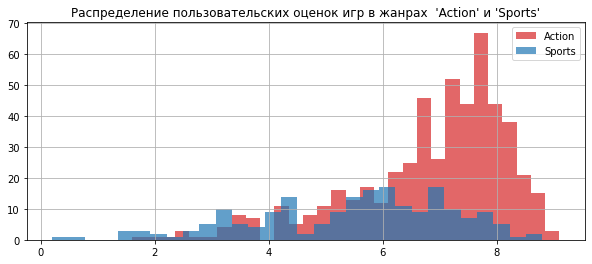

In [76]:
user_score_action_mean = good_df.query('genre == "Action" and user_score > 0')['user_score'].mean()
user_score_action_var = good_df.query('genre == "Action" and user_score > 0')['user_score'].var()
user_score_action_std = good_df.query('genre == "Action" and user_score > 0')['user_score'].std()


user_score_sports_mean = good_df.query('genre == "Sports" and user_score > 0')['user_score'].mean()
user_score_sports_var = good_df.query('genre == "Sports" and user_score > 0')['user_score'].var()
user_score_sports_std = good_df.query('genre == "Sports" and user_score > 0')['user_score'].std()


print(f'Для жанра \'Action\' cредняя пользовательская оценка - {user_score_action_mean:.1f},\nпри дисперсии {user_score_action_var:.1f} и стандартном отклонении {user_score_action_std:.1f}')
print(f'Для жанра \'Sports\' cредняя пользовательская оценка - {user_score_sports_mean:.1f},\nпри дисперсии {user_score_sports_var:.1f} и стандартном отклонении {user_score_sports_std:.1f}')

# Построение гистограммы с помощью пакета matplotlib.pyplot
good_df.query('genre == "Action" and user_score > 0')['user_score'].hist(bins=30, color='tab:red',  alpha=0.7, figsize=(10,4), label='Action')
good_df.query('genre == "Sports" and user_score > 0')['user_score'].hist(bins=30, color='tab:blue', alpha=0.7, figsize=(10,4), label='Sports')
plt.title('Распределение пользовательских оценок игр в жанрах  \'Action\' и \'Sports\'')
plt.grid(True)
plt.legend()
plt.show()

В целом оценки жанра Action выше, чем оценки жанра Sports.

## Общий вывод:

Мы провели исследование по выявлению определяющих успех игры закономерностей. Мы проанализировали исторические данные и увидели: 
- средний срок жизни платформы для видеоигр - чуть меньше 8 лет, новые платформы "волнами" захватывают рынок, интерес к слабым постепенно охладевает, среди лидирующих платформ самые молодые - PS4 и Xone, но и они уже 4 года на рынке, следует ожидать новых игроков, 
- актуальный период в истории видеоигр начался в 2012 году, когда значительно снизились продажи и одновременно появились новые игроки,
- сумма продаж всех игр за последние 5 лет - свыше 1 446 млн. проданных копий, за последний год по доступным данным - около 130 млн. В качестве рубежа "перспективной" платформы определим долю в 5% от проданных игр. Тогда за последние 5 лет к "перспективным" можно отнести платформы PS4, PS3, X360, 3DS, XOne, WiiU. Из них наиболее перспективные - востребованные в последний год - PS4 - лидер, занимающий более половины рынка, XOne, 3DS.
- отзывы критиков и продажи игр имеют слабую корреляционную связь, отзывы пользователей на продажи игр не влияют,
- рынки Европы и Северной Америки по основным параметрам похожи, рынок Японии значительно отличается от них по представленности жанров, платформ и объему - он значительно меньше.
- проверив гипотезы, мы определили: между платформами PC и XOne нет значительной разницы в оценках пользователей, а жанры Action и Sports существенно различаются по оценкам пользователей, Action имеет более высокую оценку.

Можно сделать вывод — для более успешного продвижения можно выбрать перспективную платформу - X360 для Северной Америки, PS4 для Европы, и 3DS для Японии. На успешность игры будет влиять жанр - Action имеет высокие позиции во всех регионах, Shooter - в Европе и Северной Америке, Role=Playing в Японии, а также рейтинг - пользователи не боятся игр для взрослых, а также отзывы критиков.
